# Problem Statement:

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

# Minimum Requirements:

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train-chennai-sale.csv")
data.head()
    

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
# checking number of col and and rows
data.shape

(7109, 22)

In [ ]:
#dropping unncessary columns
data = data.drop(columns = ['REG_FEE'])
data = data.drop(columns = ['COMMIS'])
data = data.drop(columns = ['PRT_ID'])

In [ ]:
# checking null values
data.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
data.head(1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.33,7600000


In [ ]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in features_with_na:
  print(feature,np.round(data[feature].isnull().mean(),4), '% missing values')

N_BEDROOM 0.0001 % missing values
N_BATHROOM 0.0007 % missing values
QS_OVERALL 0.0068 % missing values


In [ ]:
# data["N_BATHROOM"].fillna(data["N_BATHROOM"].mode,inplace = True)

In [ ]:
# data.N_BATHROOM.astype(float)

In [ ]:
data["N_BATHROOM"].mode()

0    1.0
dtype: float64

In [ ]:
data.N_BATHROOM = data.N_BATHROOM.replace({np.nan:1.0})

In [ ]:
data["QS_OVERALL"].mean()

3.5032537884152344

In [ ]:
data.QS_OVERALL = data.QS_OVERALL.replace({np.nan:3.50})

In [ ]:
data["QS_OVERALL"].dtypes

dtype('float64')

In [ ]:
# dropping entire rows whicha has null values
data = data.dropna()


In [ ]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [ ]:
# converting to datatime format
import datetime as dt
data["DATE_SALE"] = pd.to_datetime(data["DATE_SALE"], format='%d-%m-%Y')
data["DATE_BUILD"] =  pd.to_datetime(data["DATE_BUILD"], format='%d-%m-%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# calculating age of building and creating column as AGE
data['AGE'] = (data['DATE_SALE'].dt.year - data['DATE_BUILD'].dt.year).astype(int)
data.loc[data['DATE_SALE'].dt.month < data['DATE_BUILD'].dt.month, 'AGE'] = data['AGE'] - 1
data.loc[(data['DATE_SALE'].dt.month == data['DATE_BUILD'].dt.month) & (data['DATE_SALE'].dt.day < data['DATE_BUILD'].dt.day), 'AGE'] = data['AGE'] - 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
#dropping columns
data = data.drop(columns = ['DATE_BUILD'])
data = data.drop(columns = ['DATE_SALE'])

## Checking spelling mistakes in each column and correcting 


In [ ]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data.AREA = data.AREA.replace({'Karapakam':"Karapakkam"})
data.AREA = data.AREA.replace({"Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar"})
data.AREA = data.AREA.replace({'Chrompet':"Chromepet","Chrompt":'Chromepet',"Chormpet":"Chromepet","Chrmpet":"Chromepet"})
data.AREA = data.AREA.replace({'Adyr':"Adyar"})
data.AREA = data.AREA.replace({'Velchery':"Velachery"})
data.AREA = data.AREA.replace({'KK Nagar':"K. K. Nagar","KKNagar":"K. K. Nagar"})
data.AREA = data.AREA.replace({'TNagar':"T. Nagar","TNagar":"T. Nagar","T Nagar":"T. Nagar"})

In [ ]:
area = data.AREA.value_counts().reset_index(name='count')
area['percentage'] = round(area['count'] / data.shape[0] * 100, 2)
area

,index,count,percentage
0,Chromepet,1702,23.94
1,Karapakkam,1366,19.22
2,K. K. Nagar,997,14.03
3,Velachery,981,13.80
4,Anna Nagar,787,11.07
5,Adyar,774,10.89
6,T. Nagar,501,7.05


In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':"No"})

In [ ]:
data["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data.SALE_COND = data.SALE_COND.replace({'AbNormal':"Abnormal",'Ab Normal':"Abnormal",'Adj Land':"AdjLand",'PartiaLl':"Partial",'Partiall':"Partial"})

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':"Commercial",'Other':"Others"})

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':"AllPub",'NoSewr ':'NoSewr'})

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data.STREET = data.STREET.replace({'Pavd':'Paved',"NoAccess":"No Access"})

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10
2,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,21
4,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29


## Checking for outliers 

In [ ]:
data.INT_SQFT.describe()

count    7108.000000
mean     1382.048537
std       457.438429
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [ ]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
data.N_ROOM.describe()

count    7108.000000
mean        3.688661
std         1.019164
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

From these we found that, there are no outliers


## Checking corelation between all the columns

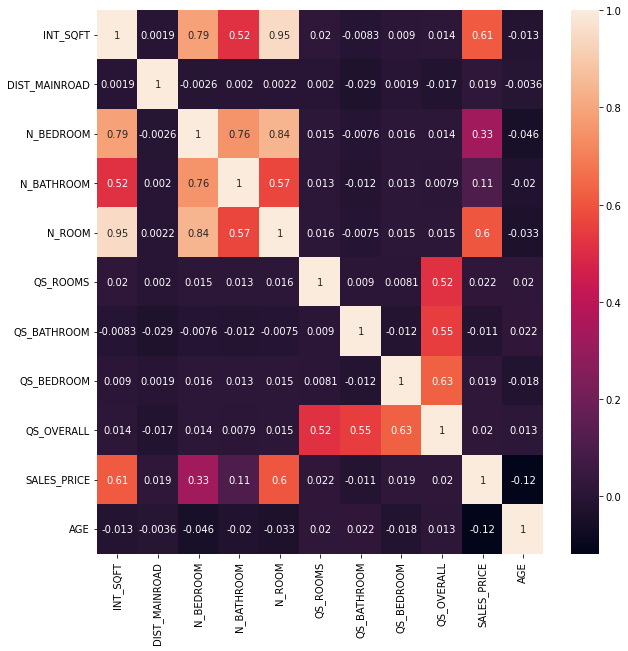

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## EDA

Text(0.5, 1.0, 'Number of sales in each area')

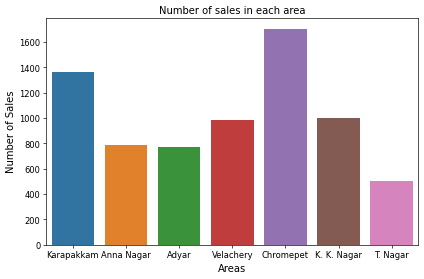

In [ ]:

a = data["AREA"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Areas", fontsize = 12)
b.set_ylabel("Number of Sales", fontsize = 12)
b.set_title("Number of sales in each area")

From above graph we conclude that Karapakkam area has the most number of sales

Text(0.5, 1.0, 'Number of Yes and No')

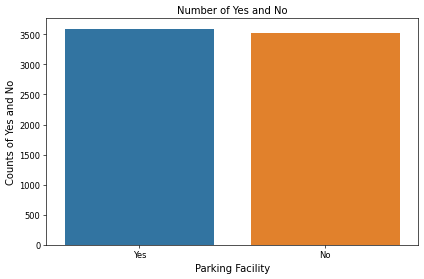

In [ ]:
a = data["PARK_FACIL"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Parking Facility", fontsize = 12)
b.set_ylabel("Counts of Yes and No", fontsize = 12)
b.set_title("Number of Yes and No")

From the above graph, we will know that most of sale property have parking facility

Text(0.5, 1.0, 'Number of Public facilities')

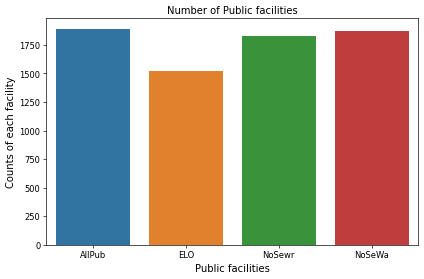

In [ ]:
a = data["UTILITY_AVAIL"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Public facilities", fontsize = 12)
b.set_ylabel("Counts of each facility", fontsize = 12)
b.set_title("Number of Public facilities")

From the above graph,we can know that most properties have all the puplic facitities

Text(0.5, 1.0, 'Counts of building types')

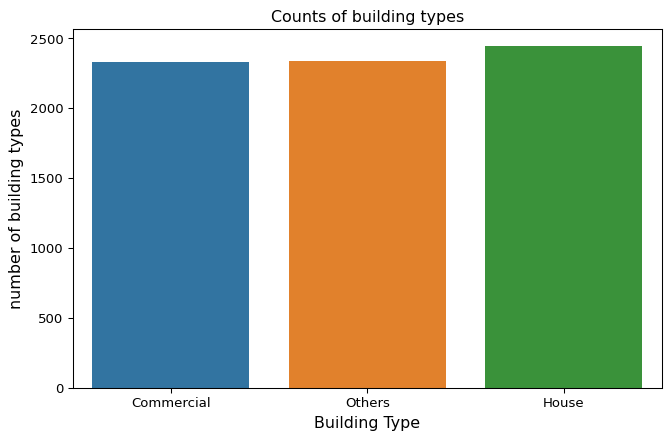

In [ ]:
a = data["BUILDTYPE"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=95)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Building Type", fontsize = 12)
b.set_ylabel("number of building types", fontsize = 12)
b.set_title("Counts of building types")

From above graph we can see that most of properties available for sale are Houses, followed by others and commercial

Text(0.5, 1.0, 'Number of counts in each type of street')

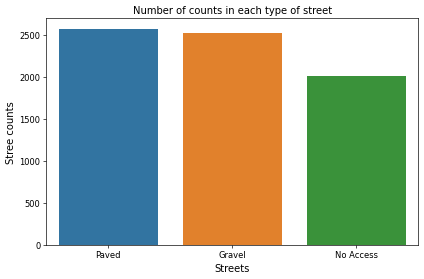

In [ ]:

a = data["STREET"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Streets", fontsize = 12)
b.set_ylabel("Stree counts", fontsize = 12)
b.set_title("Number of counts in each type of street")

From the above graph, we conclude that most of the propeties have paved street follwed by gravel

Text(0.5, 1.0, 'Number of SALE_COND')

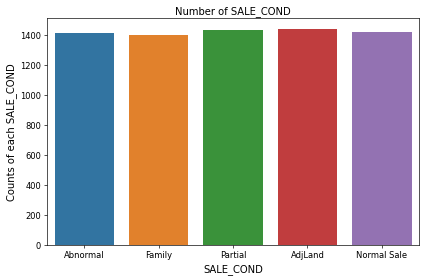

In [ ]:
a = data["SALE_COND"].value_counts(sort = False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("SALE_COND", fontsize = 12)
b.set_ylabel("Counts of each SALE_COND", fontsize = 12)
b.set_title("Number of SALE_COND")

From the above graph, we conclude that AdjLand sale condition  has more number of properties and family has least, hence we can consider label encoding for the data 

## Relationship between features and target

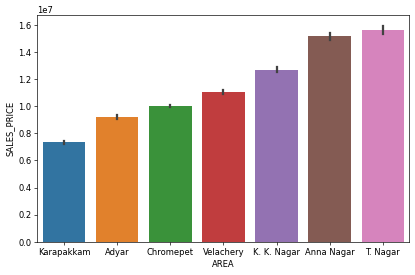

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.AREA, y = data.SALES_PRICE, order = data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

From the graph we will conclude, different areas have different sales price and T.Nagar has highest price and we found that there is linear relationship betweem area and sale price, hence we can consider label encoding for the data 

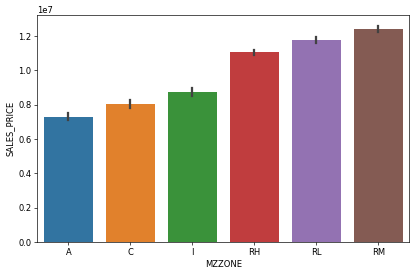

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.MZZONE, y = data.SALES_PRICE, order = data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

From the above figure, we interprete that RM zone has more sales price and there is a linear trend in sales vs Mzone, hence we can consider label encoding for the data 

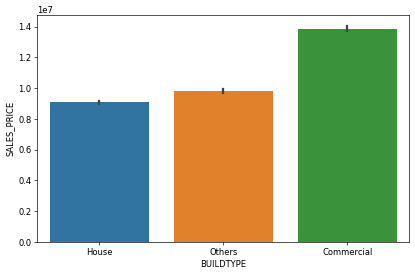

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.BUILDTYPE, y = data.SALES_PRICE, order = data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

From the above graph, we will know that commercial buildings have more sales prices compared house and others

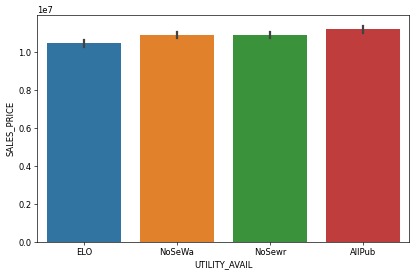

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.UTILITY_AVAIL, y = data.SALES_PRICE, order = data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

The graphs shows that the properties with all public facilities available has the most sales comapred to others, hence we can consider label encoding for the data 

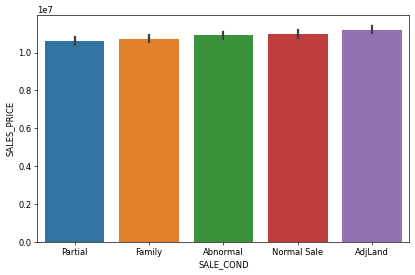

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.SALE_COND, y = data.SALES_PRICE, order = data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

From the above graph, we will know that AdjLand more sale price and Partial has least sales price, hence we can consider label encoding for the data 

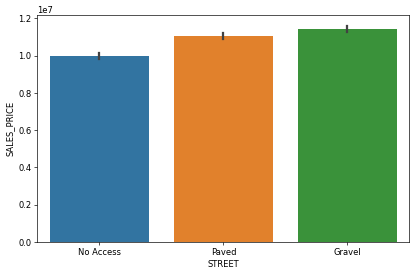

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.barplot(x = data.STREET, y = data.SALES_PRICE, order = data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

From the above graph, we can know that the price of Gravel street is higher compared to other kind of streets

In [ ]:
data.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,10


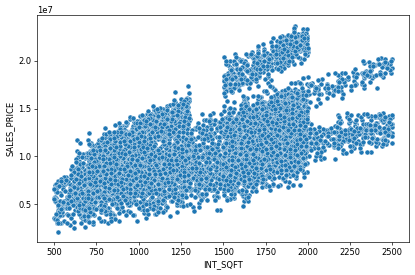

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.scatterplot(data=data, x="INT_SQFT", y="SALES_PRICE")

The scatter plot between sales price increases linearly with the increase int Sqft.

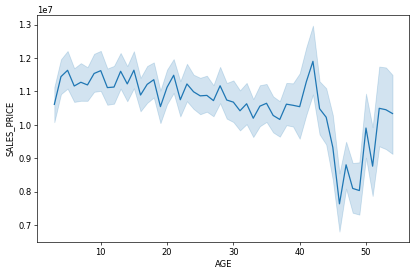

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=data, x="AGE", y="SALES_PRICE")

From the above figure we will know that, as the age of building increases the sale price decreses

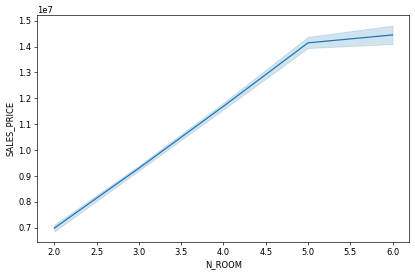

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=data, x="N_ROOM", y="SALES_PRICE")

From the above figure we will know that, as the total number of rooms of building increases the sale price also increases.

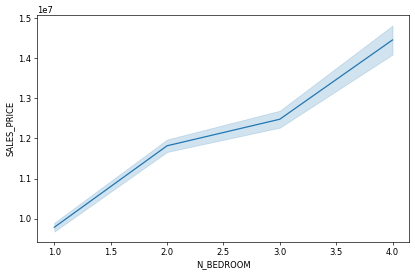

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=data, x="N_BEDROOM", y="SALES_PRICE")

The graph shows that the linear replationship exists between sales price and number of bed rooms in the property.

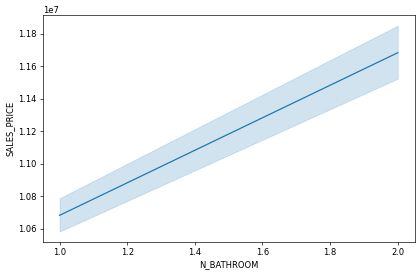

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=60)
sns.lineplot(data=data, x="N_BATHROOM", y="SALES_PRICE")

The graph shows that the linear replationship exists between sales price and number of bathrooms in the property.

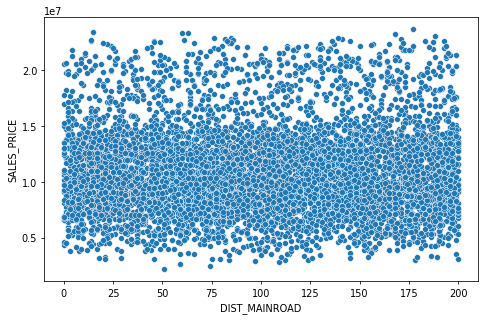

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.scatterplot(data=data, x="DIST_MAINROAD", y="SALES_PRICE")

From the above graph, we do not find any kind of linear relationship so can drop the column.



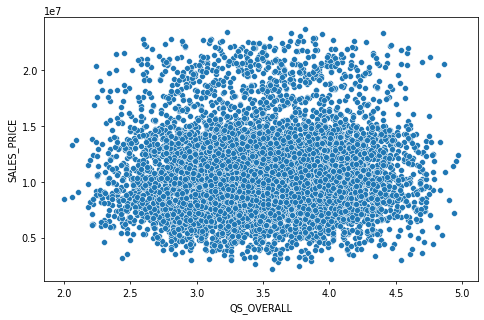

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.scatterplot(data=data, x="QS_OVERALL", y="SALES_PRICE")

From the above graph, we do not find any kind of relationship so can drop the column.

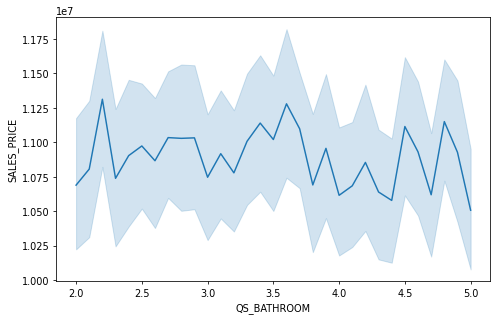

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.lineplot(data=data, x="QS_BATHROOM", y="SALES_PRICE")

We cannot conclude a relationship from the graph.

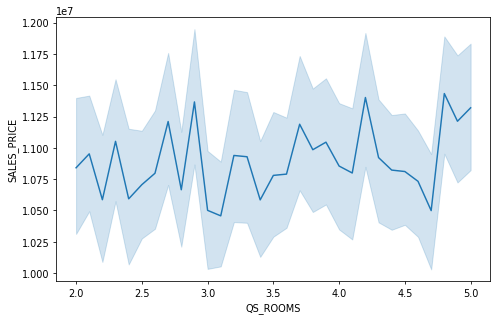

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.lineplot(data=data, x="QS_ROOMS", y="SALES_PRICE")

We cannot conclude a relationship from the graph.

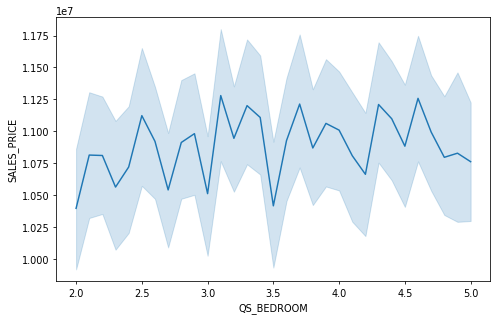

In [ ]:
fig=plt.figure(figsize=(8,5),dpi=70)
sns.lineplot(data=data, x="QS_BEDROOM", y="SALES_PRICE")

We cannot conclude a relationship from the graph.

In [ ]:
data = data.drop(columns = ['QS_OVERALL'])
data = data.drop(columns = ['DIST_MAINROAD'])
data = data.drop(columns = ['QS_BEDROOM'])
data = data.drop(columns = ['QS_ROOMS'])
data = data.drop(columns = ['QS_BATHROOM'])

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1.0,1.0,3,Abnormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2.0,1.0,5,Abnormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,1.0,1.0,3,Abnormal,Yes,Others,AllPub,Gravel,C,7406250,29


## ENCODING

Encoding for AREA column (Label Encoding)

In [ ]:
data["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'K. K. Nagar', 'T. Nagar'], dtype=object)

In [ ]:
data.AREA = data.AREA.map({'Karapakkam':0,"Adyar":1,"Chromepet":2,"Velachery":3,"K. K. Nagar":4,"Anna Nagar":5,"T. Nagar":6})

In [ ]:
data["AREA"].unique()

array([0, 5, 1, 3, 2, 4, 6])

Encoding for SALE_COND (label)

In [ ]:
data["SALE_COND"].unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data.SALE_COND = data.SALE_COND.map({"Partial":0,"Family":1,"Abnormal":2,"Normal Sale":3,"AdjLand":4})

In [ ]:
data["SALE_COND"].unique()

array([2, 1, 0, 4, 3])

Encoding for PARK_FACIL (label)

In [ ]:
data["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.map({'Yes':1,'No':0})

In [ ]:
data["PARK_FACIL"].unique()

array([1, 0])

Encoding for BUIDTYPE (label)

In [ ]:
data["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
data.BUILDTYPE = data.BUILDTYPE.map({'House':0,'Others':1,'Commercial':3})

In [ ]:
# ol = pd.get_dummies(data["BUILDTYPE"])
# data = data.drop("BUILDTYPE",axis=1)
# data = data.join(ol)

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,0,1004,1.0,1.0,3,2,1,3,AllPub,Paved,A,7600000,43
1,5,1986,2.0,1.0,5,2,0,3,AllPub,Gravel,RH,21717770,10
2,1,909,1.0,1.0,3,2,1,3,ELO,Gravel,RL,13159200,19
3,3,1855,3.0,2.0,5,1,0,1,NoSewr,Paved,I,9630290,21
4,0,1226,1.0,1.0,3,2,1,1,AllPub,Gravel,C,7406250,29


Encoding for UTILITY_AVAIL (label)

In [ ]:
data["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'ELO':0,'NoSeWa':1,'NoSewr':1,"AllPub":2})

In [ ]:
data["UTILITY_AVAIL"].unique()

array([2, 0, 1])


Encoding for STREET (label)

In [ ]:
data["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data.STREET = data.STREET.map({'No Access':0,'Paved':1,'Gravel':2})

In [ ]:
data["STREET"].unique()

array([1, 2, 0])

Encoding for MZZONE (label)

In [ ]:
data["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data.MZZONE = data.MZZONE.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

In [ ]:
data["MZZONE"].unique()

array([0, 4, 5, 2, 1, 6])

In [ ]:
data.head(2)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,0,1004,1.0,1.0,3,2,1,3,2,1,0,7600000,43
1,5,1986,2.0,1.0,5,2,0,3,2,2,4,21717770,10


In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'AGE'],
      dtype='object')

## Linear Regression

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9160423768550181


## Decission  tree

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.973846205658832


## KNN

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(20) 
knn.fit(X_train,y_train) 
y_pred=j=knn.predict(X_test)

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9320298897806596


## Bagging (Bootstrap aggregation)

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = 1, random_state=1), n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.3545602009127339


## Random Forest

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.3545602009127339


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model4 = xgb.XGBRegressor(random_state=2)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3),('xgb',model4)]) 

In [ ]:
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

[17:43:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2- SCORE: 0.9450992877571173


## Xgboost

In [ ]:
X = data[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","BUILDTYPE","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE"]].values
y = data[["SALES_PRICE"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,1.5,2,2.5]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.39104792310839254  Cross-Val score :  -0.39700134725106573
Learning rate :  0.02  Train score :  0.7447043084494553  Cross-Val score :  0.7414437534067283
Learning rate :  0.03  Train score :  0.9242569131753788  Cross-Val score :  0.9215469971062806
Learning rate :  0.04  Train score :  0.9620065333728975  Cross-Val score :  0.9594318463506811
Learning rate :  0.05  Train score :  0.973979652499652  Cross-Val score :  0.9719674482355123
Learning rate :  0.1  Train score :  0.9917885010923694  Cross-Val score :  0.990209895664881
Learning rate :  0.11  Train score :  0.9928946498690712  Cross-Val score :  0.9916507817448519
Learning rate :  0.12  Train score :  0.9939328016656536  Cross-Val score :  0.9927192347269751
Learning rate :  0.13  Train score :  0.9948301136571996  Cross-Val score :  0.9933964925865532
Learning rate :  0.14  Train score :  0.9954973871554806  Cross-Val score :  0.9940964595327806
Learning rate :  0.15  Train score :  0

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9972324395356125


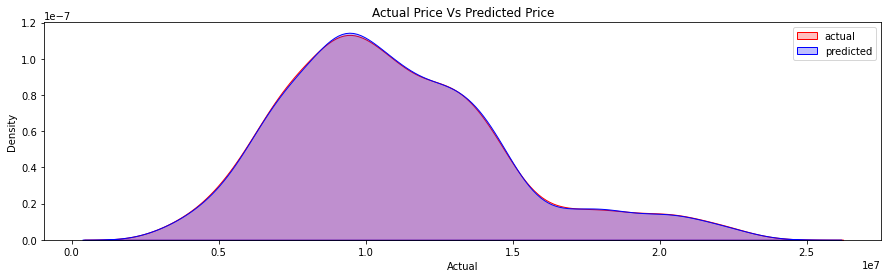

In [ ]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=df, x='Actual', label='actual', color = 'red',shade=True)
sns.kdeplot(data=df, x='Predicted', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

[17:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb.feature_importances_

array([0.2690371 , 0.0781929 , 0.00216391, 0.00140603, 0.2803942 ,
       0.25092742, 0.00491616, 0.02633218, 0.00188588, 0.01411843,
       0.06673305, 0.00389267], dtype=float32)

In [ ]:
Model = pd.DataFrame({'model_name':['LinearRegression','DecissionTree','KNN',"Bagging",'RandomForest','Voting Classifier',"Xgboost"],'r2_score':[0.916,0.973,0.932,0.354,0.354,0.945,0.997 ]})
Model

,model_name,r2_score
0,LinearRegression,0.916
1,DecissionTree,0.973
2,KNN,0.932
3,Bagging,0.354
4,RandomForest,0.354
5,Voting Classifier,0.945
6,Xgboost,0.997


We found that the Xgboost model was the best fit model with the best R2 value of 96.66% which is very close to the actual values.

# Inferences:

In customers point of view the areas Karapakkam and Chromepet are more affordable.

Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.

The building with all publlic facilities and gravel road tends to offer high sales price.

Construction of Commercial building shows higher profits and prices for the sellers and the houses are much cheaper comparitively.

Buildtype is the second most important Feature for better investments. Commercial Houses are most expensive compared to normal house.Sellers can profit if they build more of commercial building in T Nagar and Anna Nagar areas.

As the area in square Foot of the house increases, the price of the house also increases.

Zone also plays a major role in deciding the house price. Commercial and Industrial zones are more profitable.

Price of the property changes due to various factors.the major Features affecting the price are in the order of:

1. Number of rooms
2. Area (T Nagar has max pirce of peroperty)
3. Build type (commercial being costliest)
4. Sale condition


# Conclusions from Exploratory Data Analysis:

Area of the property has impact on the price which is shown even through data where the houses in T Nagar and Anna Nagar are costlier than the other areas.

Houses with more number of rooms has higher prices as we can expect.

In General Parking facility has a greater impact on the sales price and it reflects the same in the analysis

Commercial buildings are expensive than other type of buildings.

Houses with all the public facilites are sold comparively high.

Properties with gravel roads have higher prices compared to others.

Agricultural zone has cheaper prices for the houses and Resedential Medium Density Zone is the expensive one.